<a href="https://colab.research.google.com/github/AmirKh20/MLP_on_NSL-KDD/blob/master/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip

--2023-07-06 21:03:29--  http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6598776 (6.3M) [application/zip]
Saving to: ‘NSL-KDD.zip’

NSL-KDD.zip         100%[===================>]   6.29M  1.92MB/s    in 3.3s    

2023-07-06 21:03:34 (1.92 MB/s) - ‘NSL-KDD.zip’ saved [6598776/6598776]



In [ ]:
!unzip NSL-KDD.zip

Archive:  NSL-KDD.zip
  inflating: index.html              
  inflating: KDDTest1.jpg            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest+.arff           
  inflating: KDDTest+.txt            
  inflating: KDDTrain1.jpg           
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  


In [ ]:
!sed -i "s/, 'icmp'/,'icmp'/g" KDDTrain+.arff

In [ ]:
!sed -i "s/, 'icmp'/,'icmp'/g" KDDTest+.arff

In [ ]:
from scipy.io.arff import loadarff

In [ ]:
dataset_train = loadarff('KDDTrain+.arff')
dataset_test = loadarff('KDDTest+.arff')

In [ ]:
dataset_train[1]

Dataset: 'KDDTrain'
	duration's type is numeric
	protocol_type's type is nominal, range is ('tcp', 'udp', 'icmp')
	service's type is nominal, range is ('aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50')
	flag's type is nominal, range is ('OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH')
	src_bytes's type is numeric
	dst_bytes's type is numeric

In [ ]:
dataset_test[1]

Dataset: 'KDDTest'
	duration's type is numeric
	protocol_type's type is nominal, range is ('tcp', 'udp', 'icmp')
	service's type is nominal, range is ('aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50')
	flag's type is nominal, range is ('OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH')
	src_bytes's type is numeric
	dst_bytes's type is numeric


In [ ]:
import pandas as pd

In [ ]:
df_train = pd.DataFrame(dataset_train[0])

In [ ]:
df_test = pd.DataFrame(dataset_test[0])

In [ ]:
print(f'train set shape: {df_train.shape}')
print(f'test set shape: {df_test.shape}')

train set shape: (125973, 42)
test set shape: (22544, 42)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
125969,8.0,b'udp',b'private',b'SF',105.0,145.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,b'normal'
125970,0.0,b'tcp',b'smtp',b'SF',2231.0,384.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,b'normal'
125971,0.0,b'tcp',b'klogin',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
pd.read_csv('NSL-KDD Features - Sheet1.csv', usecols=[i for i in range(1, 7)])

,Feature Name,Description,Type,Value Type,Ranges (Between both train and test),Unnamed: 6
0,Duration,Length of time duration of the connection,Continuous,Integers,0 - 54451,NaN
1,Protocol Type,Protocol used in the connection,Categorical,Strings,NaN,NaN
2,Service,Destination network service used,Categorical,Strings,NaN,NaN
3,Flag,Status of the connection – Normal or Error,Categorical,Strings,NaN,NaN
4,Src Bytes,Number of data bytes transferred from source to destination in single connection,Continuous,Integers,0 - 1379963888,NaN
5,Dst Bytes,Number of data bytes transferred from destination to source in single connection,Continuous,Integers,0 - 309937401,NaN
6,Land,"If source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0",Binary,Integers,"{ 0 , 1 }",*** Values within {} are exact/possible values.
7,Wrong Fragment,Total number of wrong fragments in this connection,Discrete,Integers,"{ 0,1,3 }",NaN
8,Urgent,Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated,Discrete,Integers,0 - 3,NaN
9,Hot,"Number of “hot‟ indicators in the content such as: entering a system directory, creating programs and executing programs",Continuous,Integers,0 - 101,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [ ]:
df_train.duplicated().sum()

9

In [ ]:
df_test.duplicated().sum()

3

In [ ]:
df_train[df_train.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
26923,0.0,b'icmp',b'eco_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
34008,0.0,b'icmp',b'eco_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
79815,0.0,b'icmp',b'eco_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
79859,0.0,b'icmp',b'ecr_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
106599,0.0,b'icmp',b'ecr_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
113236,0.0,b'icmp',b'ecr_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
120163,0.0,b'icmp',b'ecr_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
120273,0.0,b'icmp',b'ecr_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
123791,0.0,b'icmp',b'eco_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,45.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'


In [ ]:
df_train[(df_train.index == 26923) | (df_train.index == 79859)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
26923,0.0,b'icmp',b'eco_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'
79859,0.0,b'icmp',b'ecr_i',b'SF',8.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'anomaly'


In [ ]:
df_train.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
X_train = df_train.iloc[:, :-1]

In [ ]:
X_test = df_test.iloc[:, :-1]

In [ ]:
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]

In [ ]:
X_train['protocol_type'].unique()

array([b'tcp', b'udp', b'icmp'], dtype=object)

In [ ]:
categoricals = X_train.columns[X_train.dtypes == 'object']

In [ ]:
categoricals

Index(['protocol_type', 'service', 'flag', 'land', 'logged_in',
       'is_host_login', 'is_guest_login'],
      dtype='object')

In [ ]:
for col in categoricals:
    print(col, X_train[col].unique())

protocol_type [b'tcp' b'udp' b'icmp']
service [b'ftp_data' b'other' b'private' b'http' b'remote_job' b'name'
 b'netbios_ns' b'eco_i' b'mtp' b'telnet' b'finger' b'domain_u' b'supdup'
 b'uucp_path' b'Z39_50' b'smtp' b'csnet_ns' b'uucp' b'netbios_dgm'
 b'urp_i' b'auth' b'domain' b'ftp' b'bgp' b'ldap' b'ecr_i' b'gopher'
 b'vmnet' b'systat' b'http_443' b'efs' b'whois' b'imap4' b'iso_tsap'
 b'echo' b'klogin' b'link' b'sunrpc' b'login' b'kshell' b'sql_net' b'time'
 b'hostnames' b'exec' b'ntp_u' b'discard' b'nntp' b'courier' b'ctf' b'ssh'
 b'daytime' b'shell' b'netstat' b'pop_3' b'nnsp' b'IRC' b'pop_2'
 b'printer' b'tim_i' b'pm_dump' b'red_i' b'netbios_ssn' b'rje' b'X11'
 b'urh_i' b'http_8001' b'aol' b'http_2784' b'tftp_u' b'harvest']
flag [b'SF' b'S0' b'REJ' b'RSTR' b'SH' b'RSTO' b'S1' b'RSTOS0' b'S3' b'S2'
 b'OTH']
land [b'0' b'1']
logged_in [b'0' b'1']
is_host_login [b'0' b'1']
is_guest_login [b'0' b'1']


In [ ]:
X_train = X_train.applymap(lambda x: int(x) if x in [b'0', b'1'] else x)

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125964.0,287.165166,2.604607e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125964.0,45569.998126,5.870541e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125964.0,19780.527619,4.021413e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125964.0,0.000198,1.408657e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125964.0,0.022689,2.535390e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125964.0,0.000111,1.436654e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125964.0,0.204423,2.150045e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125964.0,0.001223,4.524075e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125964.0,0.395764,4.890161e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125964.0,0.279270,2.394290e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
categoricals = X_train.columns[X_train.dtypes == 'object']

In [ ]:
categoricals

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [ ]:
for col in categoricals:
    print(col, X_train[col].unique())

protocol_type [b'tcp' b'udp' b'icmp']
service [b'ftp_data' b'other' b'private' b'http' b'remote_job' b'name'
 b'netbios_ns' b'eco_i' b'mtp' b'telnet' b'finger' b'domain_u' b'supdup'
 b'uucp_path' b'Z39_50' b'smtp' b'csnet_ns' b'uucp' b'netbios_dgm'
 b'urp_i' b'auth' b'domain' b'ftp' b'bgp' b'ldap' b'ecr_i' b'gopher'
 b'vmnet' b'systat' b'http_443' b'efs' b'whois' b'imap4' b'iso_tsap'
 b'echo' b'klogin' b'link' b'sunrpc' b'login' b'kshell' b'sql_net' b'time'
 b'hostnames' b'exec' b'ntp_u' b'discard' b'nntp' b'courier' b'ctf' b'ssh'
 b'daytime' b'shell' b'netstat' b'pop_3' b'nnsp' b'IRC' b'pop_2'
 b'printer' b'tim_i' b'pm_dump' b'red_i' b'netbios_ssn' b'rje' b'X11'
 b'urh_i' b'http_8001' b'aol' b'http_2784' b'tftp_u' b'harvest']
flag [b'SF' b'S0' b'REJ' b'RSTR' b'SH' b'RSTO' b'S1' b'RSTOS0' b'S3' b'S2'
 b'OTH']


In [ ]:
X_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
binary_cols = [col for col in X_train.columns if len(X_train[col].unique()) == 2]
binary_cols

['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']

In [ ]:
numericals = list(set(X_train.columns) - set(categoricals) - set(binary_cols))
numericals

['same_srv_rate',
 'dst_host_diff_srv_rate',
 'num_file_creations',
 'srv_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_count',
 'dst_bytes',
 'num_access_files',
 'urgent',
 'duration',
 'rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_rerror_rate',
 'num_compromised',
 'src_bytes',
 'dst_host_rerror_rate',
 'num_outbound_cmds',
 'count',
 'hot',
 'srv_count',
 'wrong_fragment',
 'su_attempted',
 'serror_rate',
 'dst_host_srv_diff_host_rate',
 'num_root',
 'dst_host_srv_serror_rate',
 'num_shells',
 'srv_serror_rate',
 'num_failed_logins',
 'srv_diff_host_rate']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
encoder_scaler = make_column_transformer(
    (OneHotEncoder(sparse_output=False), categoricals),
    (StandardScaler(), numericals),
    remainder='passthrough',
    verbose_feature_names_out=False,
)

In [ ]:
X_train = encoder_scaler.fit_transform(X_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
le.classes_

array([b'anomaly', b'normal'], dtype=object)

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
X_test.columns[X_test.dtypes == 'object']

Index(['protocol_type', 'service', 'flag', 'land', 'logged_in',
       'is_host_login', 'is_guest_login'],
      dtype='object')

In [ ]:
X_test = X_test.applymap(lambda x: int(x) if x in [b'0', b'1'] else x)

In [ ]:
X_test = encoder_scaler.transform(X_test)

In [ ]:
y_test = le.transform(y_test)

In [ ]:
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
X_train.shape

(125964, 122)

In [ ]:
X_test.shape

(22541, 122)

In [ ]:
import numpy as np

In [ ]:
np.unique(np.concatenate([y_train, y_test]), return_counts=True)[1]/(len(y_train)+len(y_test))

array([0.48113532, 0.51886468])

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rs = 43

In [ ]:
mlp = MLPClassifier(random_state=rs)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=43)

In [ ]:
mlp.score(X_train, y_train)

0.9980232447365914

In [ ]:
mlp.score(X_test, y_test)

0.7962823299764873

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, fbeta_score, make_scorer

In [ ]:
scoring = make_scorer(fbeta_score, beta=0.5)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(60, ), (70, ), (100, ), (10, 50)],
    'alpha': [1e-5, 1e-4, 1, 10]
}
mlp_search = GridSearchCV(estimator=mlp,
                          param_grid=param_grid,
                          n_jobs=-1,
                          scoring=scoring,
                          verbose=1)

mlp_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=MLPClassifier(random_state=43), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 1, 10],
                         'hidden_layer_sizes': [(60,), (70,), (100,),
                                                (10, 50)]},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [ ]:
mlp_search.best_params_

{'alpha': 1e-05, 'hidden_layer_sizes': (100,)}

              precision    recall  f1-score   support

           0       0.93      0.70      0.80     12830
           1       0.70      0.93      0.80      9711

    accuracy                           0.80     22541
   macro avg       0.82      0.82      0.80     22541
weighted avg       0.83      0.80      0.80     22541



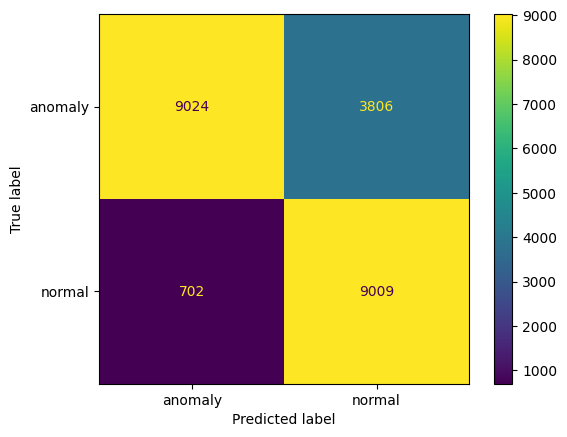

In [ ]:
print(classification_report(y_test, mlp_search.best_estimator_.predict(X_test)))
conf = ConfusionMatrixDisplay.from_estimator(estimator=mlp_search.best_estimator_,
                                      X=X_test, y=y_test,
                                      display_labels=le.classes_.astype('str'))

In [ ]:
pd.DataFrame(mlp_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,111.281912,7.815119,0.083237,0.031853,0.00001,"(60,)","{'alpha': 1e-05, 'hidden_layer_sizes': (60,)}",0.996458,0.996838,0.997121,0.997591,0.996956,0.996993,0.000370,2
1,113.982220,19.953410,0.075370,0.004554,0.00001,"(70,)","{'alpha': 1e-05, 'hidden_layer_sizes': (70,)}",0.995631,0.996396,0.995879,0.997726,0.997062,0.996539,0.000770,5
2,139.996170,14.208769,0.109134,0.030935,0.00001,"(100,)","{'alpha': 1e-05, 'hidden_layer_sizes': (100,)}",0.997328,0.996413,0.997503,0.997047,0.997324,0.997123,0.000384,1
3,95.226989,11.563733,0.065016,0.020200,0.00001,"(10, 50)","{'alpha': 1e-05, 'hidden_layer_sizes': (10, 50)}",0.996478,0.996423,0.996711,0.993937,0.997534,0.996217,0.001207,7
4,103.801344,14.397268,0.065764,0.001008,0.0001,"(60,)","{'alpha': 0.0001, 'hidden_layer_sizes': (60,)}",0.995924,0.996692,0.996454,0.994921,0.997620,0.996322,0.000890,6
5,108.667931,6.913492,0.075829,0.005679,0.0001,"(70,)","{'alpha': 0.0001, 'hidden_layer_sizes': (70,)}",0.996988,0.997371,0.996868,0.996897,0.996189,0.996862,0.000382,3
6,139.752770,22.497939,0.106134,0.035010,0.0001,"(100,)","{'alpha': 0.0001, 'hidden_layer_sizes': (100,)}",0.996782,0.997104,0.997132,0.997091,0.995764,0.996775,0.000521,4
7,110.812692,14.525051,0.081148,0.025111,0.0001,"(10, 50)","{'alpha': 0.0001, 'hidden_layer_sizes': (10, 50)}",0.995186,0.995992,0.995901,0.994189,0.997343,0.995722,0.001036,8
8,30.321642,1.649667,0.069640,0.001853,1,"(60,)","{'alpha': 1, 'hidden_layer_sizes': (60,)}",0.977153,0.975351,0.973352,0.972814,0.979327,0.975600,0.002416,10
9,29.918716,6.650777,0.088371,0.018518,1,"(70,)","{'alpha': 1, 'hidden_layer_sizes': (70,)}",0.976992,0.972402,0.974386,0.975126,0.979075,0.975596,0.002277,11


In [ ]:
scoring(mlp_search.best_estimator_, X_train, y_train)

0.9979274488320373

In [ ]:
mlp = mlp_search.best_estimator_
mlp

MLPClassifier(alpha=1e-05, random_state=43)

In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 43,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
mlp = MLPClassifier(random_state=rs, alpha=1e-5)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, random_state=43)

In [ ]:
from sklearn.metrics import RocCurveDisplay

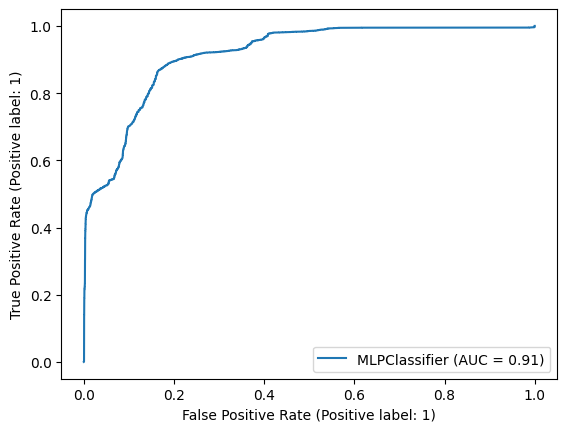

In [ ]:
roc_auc = RocCurveDisplay.from_estimator(estimator=mlp,
                                         X=X_test,
                                         y=y_test)

In [ ]:
mlp.score(X_test, y_test)

0.7847034293065969

In [ ]:
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78     12830
           1       0.68      0.93      0.79      9711

    accuracy                           0.78     22541
   macro avg       0.80      0.80      0.78     22541
weighted avg       0.82      0.78      0.78     22541



In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 43,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [ ]:
mlp_tf = Sequential(
    [
        Dense(units=150, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units=120, activation='relu'),
        Dense(units=50, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

In [ ]:
mlp_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               18450     
                                                                 
 dense_1 (Dense)             (None, 120)               18120     
                                                                 
 dense_2 (Dense)             (None, 50)                6050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 42,671
Trainable params: 42,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_tf.compile(Adam(learning_rate=1e-5), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
mpl_tf_history = mlp_tf.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=50)

Epoch 1/50
3937/3937 [==============================] - 12s 3ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 1.5040 - val_accuracy: 0.7917
Epoch 2/50
3937/3937 [==============================] - 13s 3ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 1.4955 - val_accuracy: 0.7922
Epoch 3/50
3937/3937 [==============================] - 12s 3ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 1.5049 - val_accuracy: 0.7936
Epoch 4/50
3937/3937 [==============================] - 12s 3ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 1.4740 - val_accuracy: 0.7930
Epoch 5/50
3937/3937 [==============================] - 12s 3ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 1.4814 - val_accuracy: 0.7930
Epoch 6/50
1218/3937 [========>.....................] - ETA: 9s - loss: 0.0121 - accuracy: 0.9964

KeyboardInterrupt: ignored

In [ ]:
mlp_tf = Sequential(
    [
        Dense(units=70, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units=1, activation='sigmoid')
    ]
)

In [ ]:
mlp_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 70)                8610      
                                                                 
 dense_5 (Dense)             (None, 1)                 71        
                                                                 
Total params: 8,681
Trainable params: 8,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_tf.compile(Adam(learning_rate=1e-5), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
mpl_tf_history = mlp_tf.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
3937/3937 [==============================] - 13s 3ms/step - loss: 0.4752 - accuracy: 0.8226 - val_loss: 0.6187 - val_accuracy: 0.7645
Epoch 2/200
3937/3937 [==============================] - 11s 3ms/step - loss: 0.1600 - accuracy: 0.9626 - val_loss: 0.6560 - val_accuracy: 0.7602
Epoch 3/200
3937/3937 [==============================] - 11s 3ms/step - loss: 0.1078 - accuracy: 0.9708 - val_loss: 0.7144 - val_accuracy: 0.7542
Epoch 4/200
3937/3937 [==============================] - 10s 3ms/step - loss: 0.0912 - accuracy: 0.9720 - val_loss: 0.7621 - val_accuracy: 0.7497
Epoch 5/200
3937/3937 [==============================] - 8s 2ms/step - loss: 0.0824 - accuracy: 0.9734 - val_loss: 0.7947 - val_accuracy: 0.7524
Epoch 6/200
3937/3937 [==============================] - 9s 2ms/step - loss: 0.0766 - accuracy: 0.9745 - val_loss: 0.8266 - val_accuracy: 0.7571
Epoch 7/200
3937/3937 [==============================] - 11s 3ms/step - loss: 0.0723 - accuracy: 0.9755 - val_loss: 0.8501 - v

In [ ]:
import matplotlib.pyplot as plt

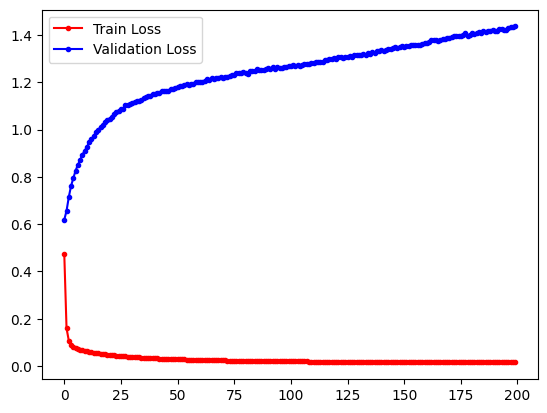

In [ ]:
fig, ax = plt.subplots()
ax.plot(mpl_tf_history.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(mpl_tf_history.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()